In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import csv
df= pd.read_csv('gdrive/My Drive/Colab Notebooks/bbs_cust_base_scfy_20200210.csv')

In [ ]:
df.describe()
df.shape

(510125, 19)

In [ ]:
df.head(5)

,image,newacct_no,line_stat,bill_cycl,serv_type,serv_code,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,term_reas_code,term_reas_desc,complaint_cnt,with_phone_service,churn,current_mth_churn
0,201801,70068143.001.000000062,AC,1,BBS,VS100DUN,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,NaN,NaN,0,N,N,N
1,201801,70068143.003.000072630,AC,1,BBS,VS030F6R,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,NaN,NaN,0,N,N,N
2,201801,70071840.001.000000066,AC,1,BBS,EAXMXMFSRN1,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,NaN,NaN,0,Y,N,N
3,201801,70071840.003.000060034,AC,1,BBS,VS100DUN,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,NaN,NaN,0,Y,N,N
4,201801,70076500.001.000000073,AC,1,BBS,PF100FSR,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),NaN,NaN,0,N,Y,N


Text(0.5, 0, 'Churned Yes/No')

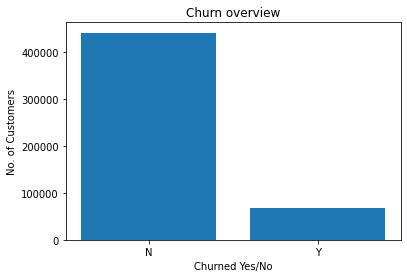

In [ ]:
# overview of churn in existing data
y = df["churn"].value_counts()
plt.bar(y.index, y.values)
plt.title("Churn overview")
plt.ylabel("No. of Customers")
plt.xlabel("Churned Yes/No")

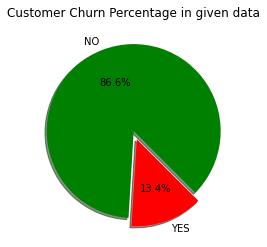

In [ ]:
sizes = df['churn'].value_counts(sort = True)
colors = ["green","red"] 
status = ['NO', 'YES']
plt.pie(sizes, explode=(0,0.1), labels=(status), colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=315,)
plt.title('Customer Churn Percentage in given data')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbee19f7278>,
      dtype=object)

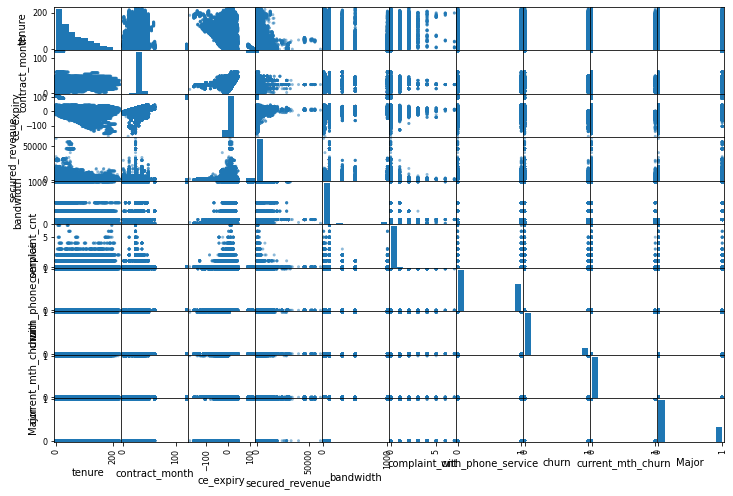

In [ ]:
from pandas.plotting import scatter_matrix
attributes = dfshort.columns
scatter_matrix(dfshort[attributes], figsize=(12, 8))

In [ ]:
import tensorflow as tf



dfshort = df[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth', 'complaint_cnt', 'with_phone_service', 'churn', 'current_mth_churn']]
dfshort=dfshort.dropna(axis=0,how='any')
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

def filter_ftto(data):
    if("FTTO" in data):
        return "Y"
    else:
        return "N"

dfshort['Major']=dfshort['bandwidth'].apply(filter_ftto)

dfshort['bandwidth']=dfshort['bandwidth'].str.replace(" ","").str.replace("(FTTO)","").str.replace("\(","").str.replace("\)","").str.replace("M","").str.replace("BELOW","").astype(int)

dfshort['with_phone_service']= le.fit_transform(dfshort['with_phone_service']) 
dfshort['churn']= le.fit_transform(dfshort['churn']) 
dfshort['current_mth_churn']= le.fit_transform(dfshort['current_mth_churn']) 
dfshort['Major']= le.fit_transform(dfshort['Major'])









X_data=dfshort[:377815]



X_train = X_data[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_train = X_data[['churn']]

X_data_test=dfshort[377815:]


X_test = X_data_test[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_test = X_data_test[['churn']]





# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_trains)
# y_train = sc.transform(y_train)
# X_test = sc.fit_transform(X_tests)
# y_test = sc.transform(y_test)


ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 100, epochs = 10)

# Part 4 - Making the predictions and evaluating the model

# Predicting the result of a single observation
count=0
y_pred = ann.predict(X_test)
lst=[]
for i in y_pred:
    if i <= 0.5:
        lst.append(0)
    else:
        lst.append(1)
        count = count+1

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3779/3779 [==============================] - 9s 2ms/step - loss: 0.1529 - accuracy: 0.9625
Epoch 2/10
3779/3779 [==============================] - 9s 2ms/step - loss: 0.0679 - accuracy: 0.9786
Epoch 3/10
3779/3779 [==============================] - 9s 2ms/step - loss: 0.0605 - accuracy: 0.9802
Epoch 4/10
3779/3779 [==============================] - 10s 3ms/step - loss: 0.0580 - accuracy: 0.9812
Epoch 5/10
3779/3779 [==============================] - 9s 2ms/step - loss: 0.0548 - accuracy: 0.98

In [ ]:
print(count)

6668


In [ ]:
print("Total customers predicted as churned by model:", count)

Total customers predicted as churned by model: 6668


In [ ]:
list(y_pred)

[array([9.41896e-09], dtype=float32),
 array([1.3142807e-06], dtype=float32),
 array([1.1825872e-17], dtype=float32),
 array([9.667308e-10], dtype=float32),
 array([4.959136e-21], dtype=float32),
 array([4.203852e-05], dtype=float32),
 array([1.1621935e-33], dtype=float32),
 array([3.3030926e-29], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([2.064814e-31], dtype=float32),
 array([1.08174624e-35], dtype=float32),
 array([9.423047e-11], dtype=float32),
 array([2.7758296e-07], dtype=float32),
 array([0.], dtype=float32),
 array([2.981747e-13], dtype=float32),
 array([2.981747e-13], dtype=float32),
 array([0.6166877], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.2588375e-05], dtype=float32),
 array([0.], dtype=float32),
 array([4.9373696e-22], dtype=float32),
 array([0.96571803], dtype=float32),
 array([1.6543377e-19], dtype=float32),
 array([0.], dtype=float32),
 array([2.0907825e-36],

In [ ]:
list(y_test)

['churn']

In [ ]:
y_test

,churn
379435,0
379436,0
379437,0
379438,0
379439,0
...,...
510120,0
510121,0
510122,0
510123,0


In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
a=y_test.values.tolist()

In [ ]:
count1=0
for i,j in zip(a,lst):
    if (i[0]==j):
        count1=count1+1

In [ ]:
print(count1)

128061


In [ ]:
len(lst)

130373

In [ ]:
print("Total no. of matched customers from actual vs predicted:",count1)

Total no. of matched customers from actual vs predicted: 128061
